# Introduction to hypothesis testing

## Formulating and simulating a hypothesis

Permutation is random reordering of entries in an array.
Our null hypothesis we assume two quantities are identically distributed.

### Generating a permutation sample

In [1]:
import numpy as np
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

### Visualizing permutation sampling

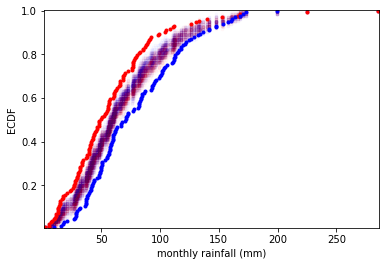

In [2]:
import matplotlib.pyplot as plt
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

rain_june = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2, 104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2, 27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4, 66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8, 13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4, 77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2, 27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4, 85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2, 85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1, 70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1, 44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4, 225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4, 68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. , 46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7, 168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])
rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3, 44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7, 112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7, 102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6, 57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2, 118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8, 59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9, 158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7, 67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5, 40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9, 28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4, 117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9, 73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2, 167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. , 161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])

for _ in range(50):
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    plt.plot(x_1, y_1, marker=".", linestyle="none", alpha=0.02, color="red")
    plt.plot(x_2, y_2, marker=".", linestyle="none", alpha=0.02, color="blue")
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
plt.plot(x_1, y_1, marker=".", linestyle="none", color="red")
plt.plot(x_2, y_2, marker=".", linestyle="none", color="blue")
plt.margins(0.002)
plt.xlabel('monthly rainfall (mm)')
plt.ylabel('ECDF')
plt.show()

The permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. June and November rainfall are not identically distributed.

## Test statistics and p-values

Testing a hypothesis is an assessment of how reasonable the observed data are assuming the hypothesis is true. A test statistic is a single number that computed from abserved data and also from the data you simulate under the null hypothesis. Choosing the test statistic to be pertinent to the question, that is been answered with the hypothesis, is important.
P-value is the probability of obtaining a value of the test statistic that is at least as extreme as what was observed, under the null hypothesis is true.

**When the p-value is small data are statistically significantly different than what we would observe under the null hypothesis.**

### Generating permutation replicates

In [3]:
def draw_perm_reps(data_1, data_2, func, size):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

### Look before you leap: EDA before hypothesis testing

Test the hypothesis that the two frogs have the same distribution of impact forces.

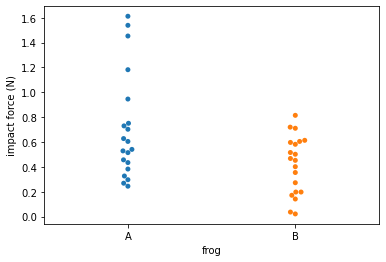

In [4]:
# from urllib.request import urlretrieve
import pandas as pd
# url = "https://assets.datacamp.com/production/repositories/470/datasets/df6e0479c0f292ce9d2b951385f64df8e2a8e6ac/frog_tongue.csv"
# data = urlretrieve(url, "frog.csv")
df = pd.read_csv("frog.csv")
df = df[df["ID"].isin(["II", "IV"])][["ID", "impact force (mN)"]]
df["impact force (mN)"] = df["impact force (mN)"] /1000
df["ID"] = df["ID"].replace("II", "A").replace("IV", "B")
df = df.rename(columns = {"impact force (mN)":"impact_force"})
import seaborn as sns
sns.swarmplot(x="ID", y="impact_force", data=df)
plt.xlabel('frog')
plt.ylabel('impact force (N)')
plt.show()

It does not look like they come from the same distribution. 

### Permutation test on frog data

The difference of mean is 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. 

p-value = 0.004


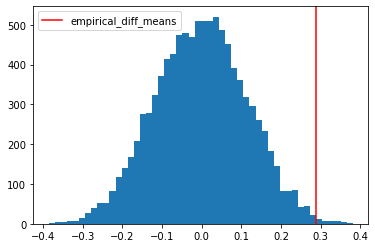

In [5]:
force_a = df[df["ID"] == "A"]["impact_force"]
force_b = df[df["ID"] == "B"]["impact_force"]
def diff_of_means(data_1, data_2):
    diff = np.mean(data_1) - np.mean(data_2)
    return diff
empirical_diff_means = diff_of_means(force_a, force_b)
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, size=10000)
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
print('p-value =', p)
plt.hist(perm_replicates, bins=50)
plt.axvline(x=empirical_diff_means, color="red", label="empirical_diff_means")
plt.legend()
plt.show()

The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically  "statistically significant," but it is a number. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are not the same.

## Bootstrap hypothesis tests


The true mean speed of light in Michelson's experiments was actually Newcomb's reported value.

0.1607


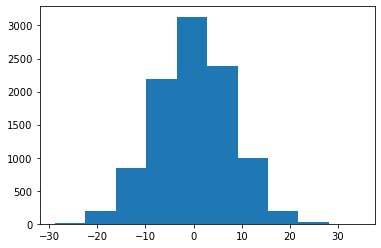

In [6]:
df = pd.read_csv("speed_of_light.csv")
speed_shifted = df["velocity of light in air (km/s)"] - df["velocity of light in air (km/s)"].mean() + 299860
def diff_from_newcomb(data, newcomb_value = 299860):
    return np.mean(data) - newcomb_value

def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

diff_obs = diff_from_newcomb(df["velocity of light in air (km/s)"].mean())
bs_replicates = draw_bs_reps(speed_shifted, diff_from_newcomb, 10000)
p_value = np.sum(bs_replicates <= diff_obs) / len(bs_replicates)
print(p_value)
plt.hist(bs_replicates)
plt.show()

p_value is high so null hypothesis is not rejected. So Michelson and Newcomb did not really have fundamental differences in their measurements. 
That is a one sample test. Comparing one set of data to a single number.

### A one-sample bootstrap hypothesis test


Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. 

In [119]:
df = pd.read_csv("frog.csv")
force_b = df[df["ID"] == "IV"]["impact force (mN)"] /1000
force_c = 0.55
translated_force_b = force_b - np.mean(force_b) + force_c
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000
print("p = ",p)

p =  0.0047


The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

Before we know there is a difference between their means but it could be insignificant. Maybe there were some outlier to affect the mean of frog B. By doing bootstrapping we test our hypothesis and we see that the difference of the mean is actually significant.

### A two-sample bootstrap hypothesis test for difference of means

We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

Both arrays are shifted to have the same mean, since the hypothesis is that their means are, in fact, equal. 

**So we assume that their means are the same do the bootstrapping for many times and calculate the diffences of the means again and see if the actual mean difference is significant or not for this population of mean differences. If it is significant so our data are not having the same mean.**

In [130]:
forces_concat = force_a.append(force_b)
mean_force = np.mean(forces_concat)
force_a_shifted = force_a - np.mean(force_a) - mean_force
force_b_shifted = force_b - np.mean(force_b) - mean_force
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)
bs_replicates = bs_replicates_a - bs_replicates_b
p = np.sum(bs_replicates >= np.mean(force_a) - np.mean(force_b)) / len(bs_replicates)
print("p-value =",p)

p-value = 0.0043


">= <=" is decided after running the histogram of the replicates and the actual mean on the same plot.

distribution of the impact force -> permutation

mean of the impact force -> bootstrapping
